In [1]:
# Solved in 5,000 steps

In [2]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import ContinuosActorCritic
from src.networks import ActorCriticNetwork
from src.policies import GaussianPolicy
from src.experience import ExperienceSorceDiscountedSteps

GAMMA = 0.99
LEARNING_RATE = 0.0001
ENTROPY_BETA = 0.01
N_STEPS = 4
BATCH_SIZE = 32

CHECKPOINT_PATH = os.path.join("models", "05_pendulum_ac.tar")


env = gym.make("Pendulum-v0")
test_env = gym.make("Pendulum-v0")
device = torch.device("cpu")
net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = ContinuosActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [3]:
env.action_space

Box(-2.0, 2.0, (1,), float32)

In [4]:
agent.policy = GaussianPolicy(agent.net, agent.env, agent.device)
agent.test_policy = GaussianPolicy(agent.net, agent.test_env, agent.device, test=True)
agent.exp_train_source = ExperienceSorceDiscountedSteps(
    env=agent.env,
    policy=agent.policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source = ExperienceSorceDiscountedSteps(
    env=agent.test_env,
    policy=agent.test_policy,
    gamma=agent.gamma,
    n_steps=agent.n_steps,
    steps=BATCH_SIZE,
)
agent.exp_test_source.render = True

In [5]:
random_net = ActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)
random_policy = GaussianPolicy(random_net, env, device)
exp_random_source = ExperienceSorceDiscountedSteps(test_env, random_policy, gamma=GAMMA, n_steps=N_STEPS, steps=BATCH_SIZE)

In [6]:
exp_random_source.render = True
exp_random_source.play_episode()
test_env.close()

In [7]:
agent.learn(5_000, verbose_every=100)
# agent.plot_performance()

  2%|▏         | 102/5000 [00:07<05:40, 14.40it/s]
 100: loss=0.915076,  mean reward=-1227.56,  steps/ep=200,  episodes=64
  4%|▍         | 202/5000 [00:14<05:30, 14.53it/s]
 200: loss=0.660280,  mean reward=-1302.78,  steps/ep=200,  episodes=128
  6%|▌         | 302/5000 [00:20<05:27, 14.35it/s]
 300: loss=-0.029634,  mean reward=-1420.03,  steps/ep=200,  episodes=192
  8%|▊         | 402/5000 [00:27<05:21, 14.30it/s]
 400: loss=0.323805,  mean reward=-1364.79,  steps/ep=200,  episodes=256
 10%|█         | 502/5000 [00:34<05:14, 14.30it/s]
 500: loss=-0.024989,  mean reward=-1229.32,  steps/ep=200,  episodes=320
 12%|█▏        | 602/5000 [00:41<05:05, 14.42it/s]
 600: loss=0.219118,  mean reward=-1150.71,  steps/ep=200,  episodes=384
 14%|█▍        | 702/5000 [00:48<05:01, 14.24it/s]
 700: loss=0.262118,  mean reward=-1147.09,  steps/ep=200,  episodes=448
 16%|█▌        | 802/5000 [00:55<04:49, 14.52it/s]
 800: loss=-0.124950,  mean reward=-1122.43,  steps/ep=200,  episodes=512
 18%|█

In [27]:
agent.exp_train_source.render = True
agent.exp_train_source.play_episode()
env.close()
agent.exp_train_source.render = False

In [28]:

agent.test(num_episodes=1)
test_env.close()

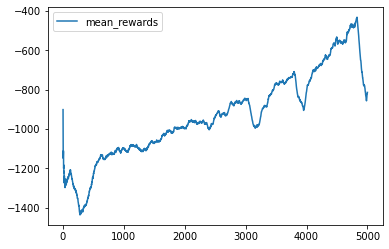

In [9]:
agent.plot_performance(['mean_rewards'])

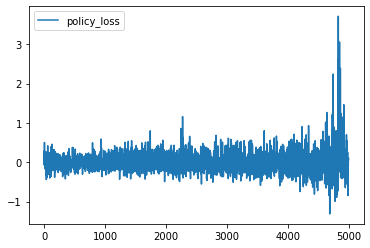

In [10]:
agent.plot_performance(['policy_loss'])

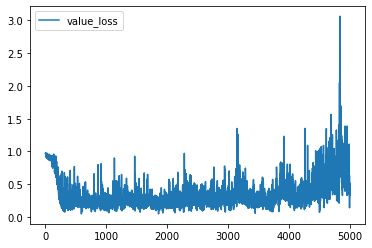

In [11]:
agent.plot_performance(['value_loss'])


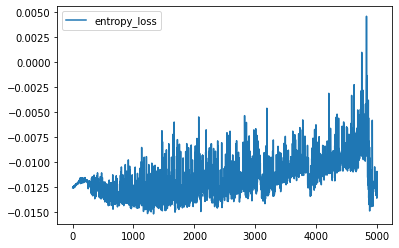

In [12]:
agent.plot_performance(['entropy_loss'])


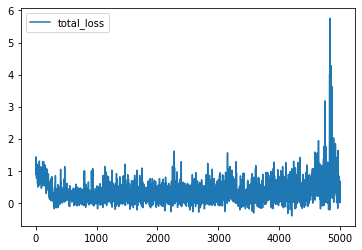

In [13]:
agent.plot_performance(['total_loss'])
